<a href="https://colab.research.google.com/github/GianlucaScanu/QML/blob/development/classic_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.6MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 350kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.22MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.57MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



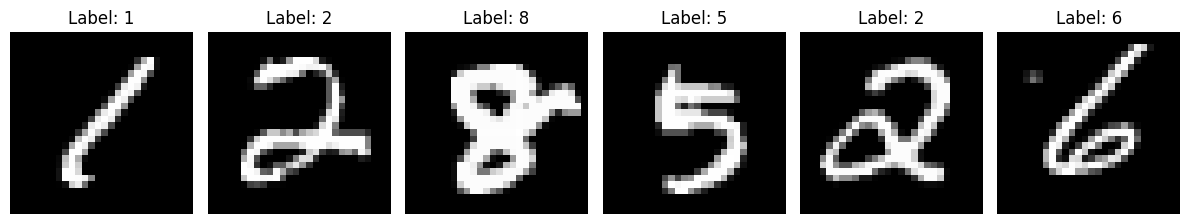

In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Setting random seed
torch.manual_seed(42)

# Define the transform to normalize and convert the data to tensors
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Loading train and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Function to display samples
def show_samples(dataset, num_samples=6):
    # Create a DataLoader to shuffle and batch the data
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=num_samples, shuffle=True)
    data_iter = iter(dataloader)
    images, labels = next(data_iter)

    # Plot the images and corresponding labels
    fig, axes = plt.subplots(1, num_samples, figsize=(12, 4))
    for i in range(num_samples):
        axes[i].imshow(images[i].squeeze(), cmap='gray')
        axes[i].set_title(f"Label: {labels[i].item()}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Display some samples from the training dataset
show_samples(train_dataset)


Epoch 1/5:
Loss: 0.3097
Accuracy: 90.54%
Epoch 2/5:
Loss: 0.1570
Accuracy: 95.40%
Epoch 3/5:
Loss: 0.1226
Accuracy: 96.30%
Epoch 4/5:
Loss: 0.1064
Accuracy: 96.76%
Epoch 5/5:
Loss: 0.0978
Accuracy: 97.06%
Test Accuracy: 97.67%


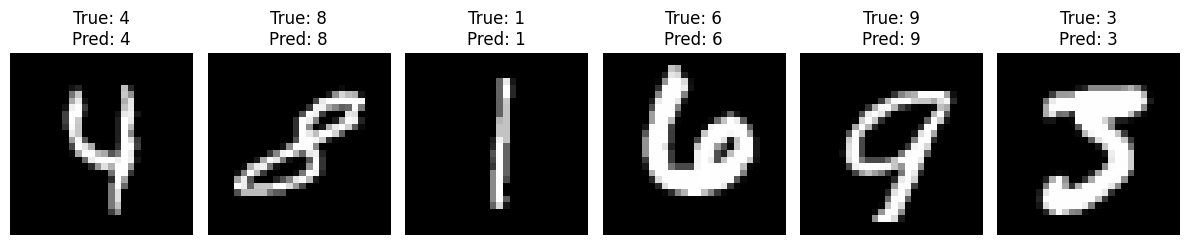

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the transform to normalize and convert the data to tensors
transform = transforms.Compose([
    transforms.ToTensor(),
    # Normalize the data (optional, but can help with training)
    transforms.Normalize((0.1307,), (0.3081,))
])

# Loading train and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        # Flatten the 28x28 image to a 784-dimensional vector
        self.flatten = nn.Flatten()

        # Define fully connected layers
        self.layers = nn.Sequential(
            # First hidden layer
            nn.Linear(28*28, 256),  # Input: 784 (28x28 image), Output: 256 neurons
            nn.ReLU(),  # Activation function
            nn.Dropout(0.3),  # Dropout for regularization

            # Second hidden layer
            nn.Linear(256, 128),  # 256 inputs, 128 outputs
            nn.ReLU(),
            nn.Dropout(0.3),

            # Output layer
            nn.Linear(128, 10)  # 10 output neurons (one for each digit 0-9)
        )

    def forward(self, x):
        # Flatten the input
        x = self.flatten(x)

        # Pass through the layers
        return self.layers(x)

# Instantiate the model
model = MNISTClassifier()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0

        for batch_idx, (data, target) in enumerate(train_loader):
            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            output = model(data)

            # Compute loss
            loss = criterion(output, target)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Compute accuracy
            total_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

        # Print epoch statistics
        print(f'Epoch {epoch+1}/{epochs}:')
        print(f'Loss: {total_loss/len(train_loader):.4f}')
        print(f'Accuracy: {100 * correct / total:.2f}%')

# Evaluation function
def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    print(f'Test Accuracy: {100 * correct / total:.2f}%')

# Function to display samples with predictions
def show_samples_with_predictions(model, dataset, num_samples=6):
    # Create a DataLoader to shuffle and batch the data
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=num_samples, shuffle=True)
    data_iter = iter(dataloader)
    images, labels = next(data_iter)

    # Get model predictions
    model.eval()
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

    # Plot the images and corresponding labels
    fig, axes = plt.subplots(1, num_samples, figsize=(12, 4))
    for i in range(num_samples):
        axes[i].imshow(images[i].squeeze(), cmap='gray')
        axes[i].set_title(f"True: {labels[i].item()}\nPred: {predicted[i].item()}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == '__main__':
    # Train the model
    train(model, train_loader, criterion, optimizer, epochs=5)

    # Evaluate the model
    evaluate(model, test_loader)

    # Show some samples with predictions
    show_samples_with_predictions(model, test_dataset)